# About Dataset
## Business problem

### Most American institutions (that are not necessarily the top 10-20) that provide undergraduate education face a challenge i.e. what kind of students they will make an offer for admission so that they can maintain a good performance in terms of number of students completing their courses in time. They also need to predict how the current batch of intake will perform. The universities cannot relax the entry criteria too much as that way the quality of education that they provide gets diluted. At the other hand, they have to make offers to the candidates who are not only having appropriate profile but are also most likely to accept the offers.
### On the other side, the students have a challenge deciding which colleges they should apply i.e. the colleges that provide best performance at a minimal cost given their own profiles. The student profile is determined by not only the performance in examination such as SAT and ACT, but also other data points such as their ethnicity, immigration status, gender etc.
### We will be interested in answering three main questions for an institute i.e.

### (a) What will be a likely enrollment rate?
### (b) What will be a likely graduation rate?
### (c) Which are the most lucrative colleges for students in terms of pass rate and cost?

## Content

### What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

### Use the dataset provided at https://public.tableau.com/en-us/s/resources. It is called “American University Data”.


In [2]:
# for manipulation of data
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# changing directory 
import os
os.chdir('D:\Imarticus\Project\EDA project')
os.listdir()

['archive.zip', 'EDA-CollegeStudents.ipynb', 'IPEDS_data.xlsx']

In [3]:
#import data

data=pd.read_excel('IPEDS_data.xlsx')
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


# Data cleaning and formating

In [4]:
data.shape

(1534, 145)

In [5]:
print('The dataset contains {} rows and {} columns'.format(data.shape[0],data.shape[1])) 

The dataset contains 1534 rows and 145 columns


In [6]:
# Now lets see some additional features

data.info(max_cols=len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [7]:
# so we can see there are some missing value from above table
# total missing values

data.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [8]:
# If we take a look at the number of non-null elements of each column we can see that many columns,
# for example the column SAT Writing 75th percentile score, contain several null or NaN values.

## Working with missing,incorrect and invalid data

In [9]:
# lets first treat Missing values (NaN values)

# first lets find nan % in each column
perc_nan = data.isna().sum()/len(data)*100

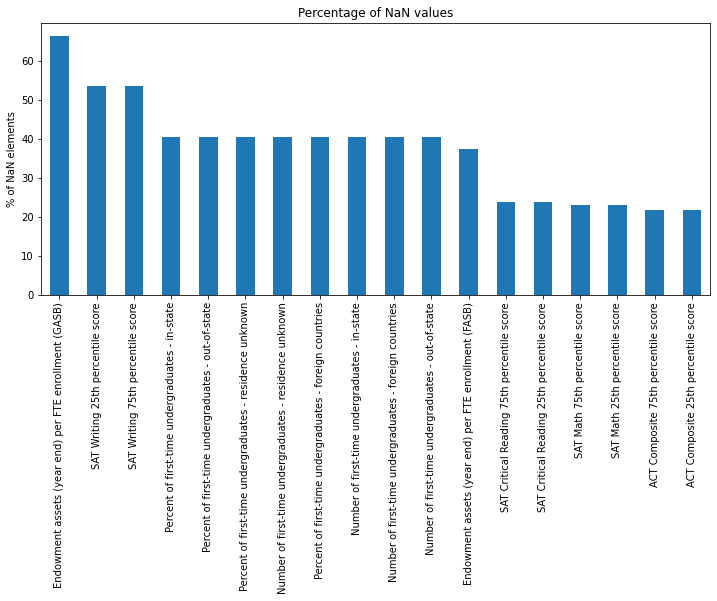

In [10]:
# Visualizing

ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [11]:
# let's see only the columns with 20% or more of NaN values.

colum_off= data.isna().sum() [data.isna().sum()>=(0.2*len(data))]
colum_off

# below columns have more than 20% of missing values and have to be revoved  since those columns cannot be used as representative values.
# But before removing them, I'll create a copy of the data frame, and I'll continue working on this new data frame. 


SAT Critical Reading 25th percentile score                   365
SAT Critical Reading 75th percentile score                   365
SAT Math 25th percentile score                               352
SAT Math 75th percentile score                               352
SAT Writing 25th percentile score                            820
SAT Writing 75th percentile score                            820
ACT Composite 25th percentile score                          335
ACT Composite 75th percentile score                          335
Number of first-time undergraduates - in-state               623
Percent of first-time undergraduates - in-state              623
Number of first-time undergraduates - out-of-state           623
Percent of first-time undergraduates - out-of-state          623
Number of first-time undergraduates - foreign countries      623
Percent of first-time undergraduates - foreign countries     623
Number of first-time undergraduates - residence unknown      623
Percent of first-time und

In [12]:
list_colum_off=colum_off.index.to_list()

org_data = data.copy()

In [13]:
# now we drop the columns having more than 20% of nan values

data.drop(list_colum_off , axis=1, inplace=True) 

In [14]:
# From the remaining columns, only those that are related to the goal of this project will be selected to continue working on them.
data.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving any financial aid',
       'Percent of freshmen receiving federal, state, local or institutional grant aid',
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid'],
      dtype='object', length=127)

In [15]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [16]:
data1 = data[interesting_columns]
data1.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [17]:
print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(data1.shape[1],data1.shape[1],data1.shape[0],data1.shape[0]))

The data frame now has 28 columns out of the 28 original columns, and 1534 rows out of the 1534 original rows.


## --Invalid values 
### Now let's check if the data frame contains invalid values. These values can be more dangerous than missing values because they can produce errors that can be tricky to identify. First, we can try to find out if the data frame has negative values.

### To perform this, we need to identify which columns contain numerical values. Only those columns will be assessed.



In [18]:
col=data1.select_dtypes(include=['float64','int64']).columns
col

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')

In [19]:
lt=list()
for i in col:
    y= any(x < 0 for x in data1[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


### Therefore, for this dataset, we do not need to be preoccupied with handling negative invalid values.

# -Inconsistent values


In [20]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1534.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
Applicants total,1377.0,6391.193174,8787.469171,0.0,1488.00,3350.0,7016.00,72676.0
Admissions total,1377.0,3554.880174,4309.457606,0.0,950.00,2056.0,4203.00,35815.0
Enrolled total,1377.0,1043.046478,1285.165519,0.0,287.00,538.0,1246.00,10241.0
"Estimated enrollment, total",1532.0,7033.115535,9387.648898,68.0,1497.25,3126.0,8376.00,79576.0
"Tuition and fees, 2013-14",1497.0,20727.490314,12455.805360,1032.0,8542.00,20060.0,29992.00,49138.0
Total price for in-state students living on campus 2013-14,1400.0,34935.306429,13283.049319,9768.0,22487.00,34115.0,44835.75,64988.0
Total price for out-of-state students living on campus 2013-14,1400.0,38767.612857,10716.524007,9768.0,31128.00,37193.5,45907.50,64988.0
Full-time enrollment,1532.0,5371.494125,7474.494963,0.0,1199.00,2328.0,6080.75,50012.0
Part-time enrollment,1532.0,1698.620104,2922.064160,0.0,167.00,671.0,2062.50,40985.0


### According to the description chart, there are some universities which, for example, in 2013, had 0 applications in total, 0 admissions in total, and 0 enrollments in total. These are inconsistent values, and they need to be handled.

### Let's find the total number of entries with 0 value.

In [21]:
total_zero=(data1[data1.loc[0:]==0]).count().sum()

In [22]:
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 395 zero values.


### This data set contains 395 zero values.

### In the specific case of this data set, the entries with a zero value do not have sense; in fact, the most probable reason 
### for them is that the information was not available at that time, but it doesn't mean they are 0.
### Therefore, I prefer to replace those entries with NaN values. In this way, if a pandas function is applied, 
### none of those NaN values will be considered.

In [23]:
data1.replace(0,np.nan,inplace=True)

C:\Users\ambar\AppData\Local\Temp\ipykernel_27280\2560518489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace(0,np.nan,inplace=True)


In [24]:
# This data set contains 0 zero values.

data1[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


## Giving format

### Now, in order to use the column names as properties and take advantage of it, it's necessary to remove some special characters that some column names contain, for example, apostrophe ', hyphen -, quotation marks ", colon :, and slash /. Also, some column names contain spaces between their words; these spaces will be removed as well.

In [25]:
def remove_space(header):
    
    '''This function takes all the spaces between the words of column names and replaces them
    with '_' . 
    
    The argument header corresponds to a column name. '''
    
    list1=list()
    words_header=header.split()    
    size=int(len(words_header))
    
    for i in range(len(words_header)):
        if i<size-1:
            list1.append(words_header[i]+'_')            
        else:
            list1.append(words_header[i])
                
    separator = ''
    final=separator.join(list1)    
    
    return final

In [26]:
def remove_sp_char(header):
    
    '''This function takes all the special characters found in column names and replaces them
    with other character accordingly to the case. 
    
    The argument header corresponds to a column name. '''
    
    if "'" in header:
        header=header.replace("'",'')
    if "," in header:
        header=header.replace(",",'')
    if "_-_" in header:
        header=header.replace("_-_",'_')
    if "/" in header:
        header=header.replace("/",'_or_')
    if ":" in header:
        header=header.replace(":",'')
    if "-" in header:
        header=header.replace("-",'_')
        
    return header

In [27]:
# Besides removing spaces and replacing special characters, I'll change capitalized letters to avoid a typo of this kind.

list_new_head=list()
headers=data1.columns

for header in headers:
    header1=remove_space(header) # Spaces are replaced.
    header1=header1.casefold()   # All capitalized letters are changed.
    header1=remove_sp_char(header1) # Special characters are replaced.
      
    if "degrese" in header1:    # One column name has a typo.  
        header1=header1.replace("degrese",'degrees')
            
    list_new_head.append(header1)

In [28]:
# The next step is to replace the original column names with the new ones, which have the desired format.

data1.columns=list_new_head

In [33]:
data1[['state_abbreviation']].head(2)

,state_abbreviation
0,Alabama
1,Alabama


## 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).

In [ ]:
# To find insight from our dataset, we'll explore its variables. 
# This exploratory analysis will help us to understand how the variables interact and how representative they are.
# In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works.

In [35]:
import matplotlib
matplotlib.rcParams['figure.facecolor']='whitesmoke'

In [36]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
    display(data1.describe())

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1534.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


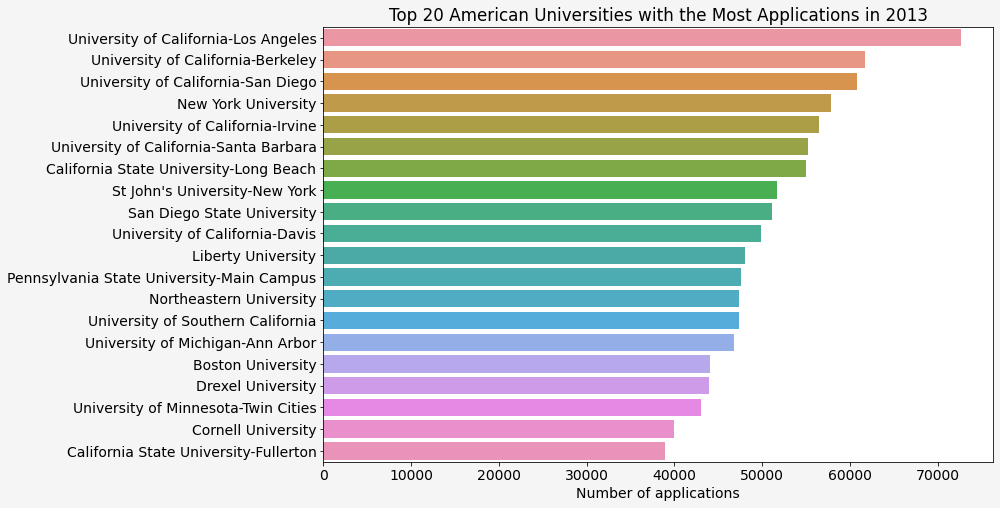

In [37]:
# It's interesting to see that in 2013 one university received around 72000 applications; whereas, another received only 4 applications in the same year. 
# So, let's see which universities received the highest number of applications.

high_app_df=data1[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)
high_app_df;

plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants_total',y='name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('');

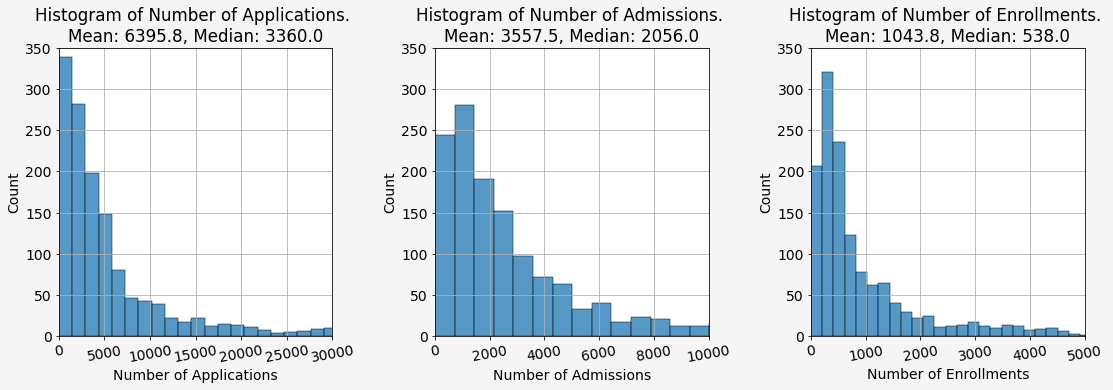

In [38]:
# We could think that the universities with the highest number of applications are the preferred ones by students.
# However, one student can send several applications at the same time, but only one university could be the preferred one;
# the other universities could be just in case of not being admitted to the preferred one.
# To find out if the universities with the most applications are the preferred ones,
# let's find some relationships with the number of admissions and enrollments.

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(data1.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(data1.applicants_total.mean(),data1.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(data1.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(data1.admissions_total.mean(),data1.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(data1.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(data1.enrolled_total.mean(),data1.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

### As we can see, the majority of universities received less than 5000 applications in 2013. However, some universities received a much higher number of applications, as many as 30000 applications in the same year.

#### We also can see that the average number of admissions is much lower than that of applications. The majority of universities admitted to less than 2000 students in 2013; however, some other universities presented a much higher number of admissions, more than 10000 admissions. As a high rate of admissions could represent a high possibility to be accepted, we could ask: ***Do students prefer universities with a high rate of admission?***

### For now, we have two closely-related questions: 
#### Q: Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?.
The second question: 
#### Q: Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?.

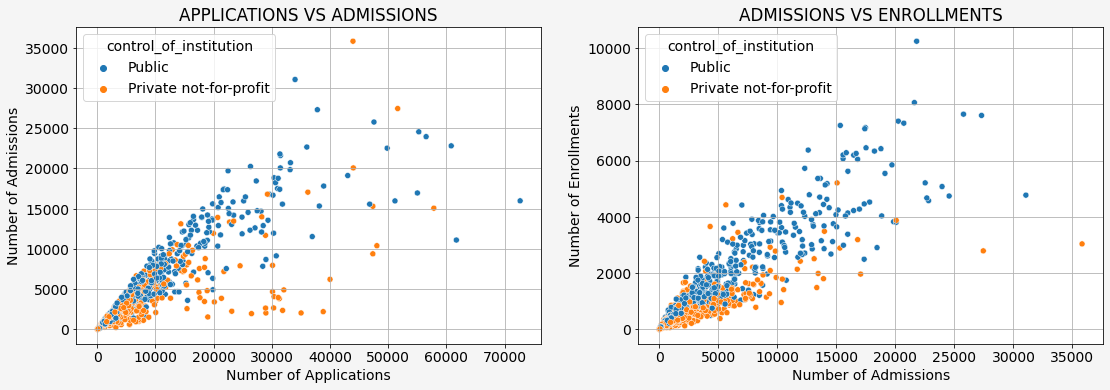

In [39]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=data1.admissions_total,x=data1.applicants_total,hue=data1.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=data1,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [ ]:
# If we look at the left figure, we can see that, with a few exceptions, 
# universities with a high number of applications also have a high number of admissions, and vice versa. 
# However, the universities with the highest number of applications are not the ones with the highest number of admissions.
# Additionally, there is a batch of private universities with a high amount of applications, but their number of admissions is pretty low. 

# If we look at the figure on the right, we can see that the higher the number of admissions, the higher the number of enrollments too.
# However, it could be more meaningful to work with a rate of admissions or acceptance and an enrollment rate. 


C:\Users\ambar\AppData\Local\Temp\ipykernel_27280\2135551352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['acceptance_rate']=(data1.admissions_total/data1.applicants_total*100).round(2)
C:\Users\ambar\AppData\Local\Temp\ipykernel_27280\2135551352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['enrollment_rate']=(data1.enrolled_total/data1.admissions_total*100).round(2)


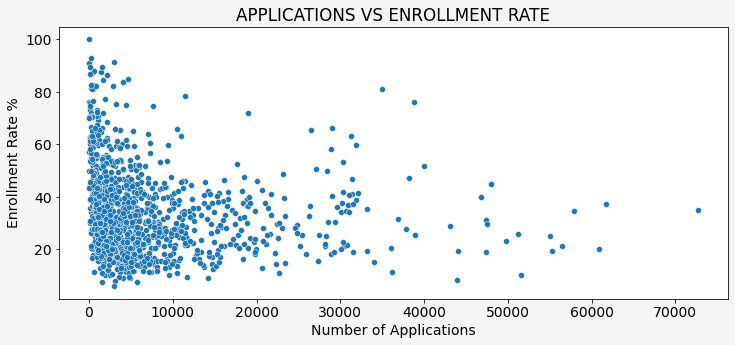

In [40]:
# Let's find the acceptance rate and enrollment rate.

data1['acceptance_rate']=(data1.admissions_total/data1.applicants_total*100).round(2)

data1['enrollment_rate']=(data1.enrolled_total/data1.admissions_total*100).round(2)

plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=data1)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');



#### This figure tells us that the universities which receive a lower number of applications are the ones with a higher enrollment rate. Obviously, there are some exceptions, but this is the strongest tendency. ***Consequently, we can say that a high number of applications does not mean that a university is preferred among students.***

## Now, let's answer the inquiry about the number of admissions.

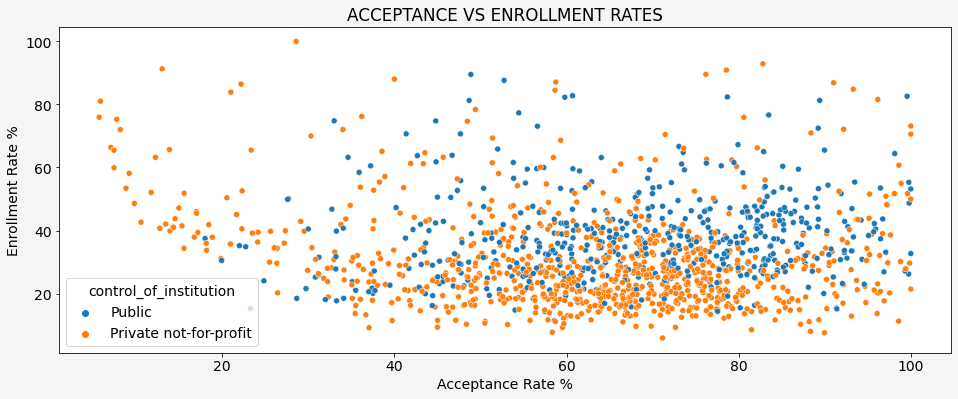

In [41]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=data1,hue=data1.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

## Another interesting feature that could influence on students is the type of university. 
#### Q: Do students prefer public or private universities?

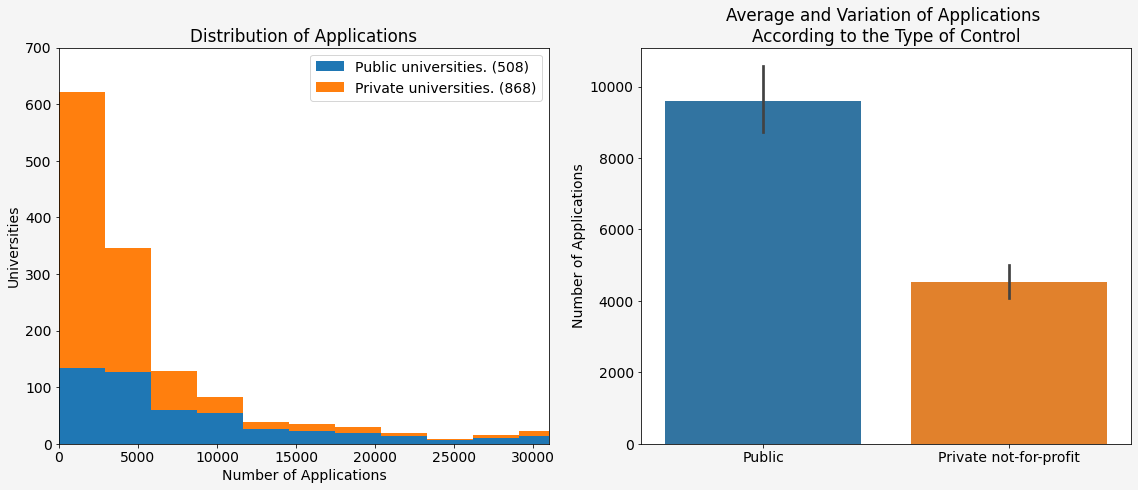

In [42]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df=data1[data1.control_of_institution=='Private not-for-profit']
uni_private_df=uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df=data1[data1.control_of_institution=='Public']
uni_public_df=uni_public_df[uni_public_df.applicants_total.notnull()]

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.applicants_total,uni_private_df.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=data1.control_of_institution,y=data1.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

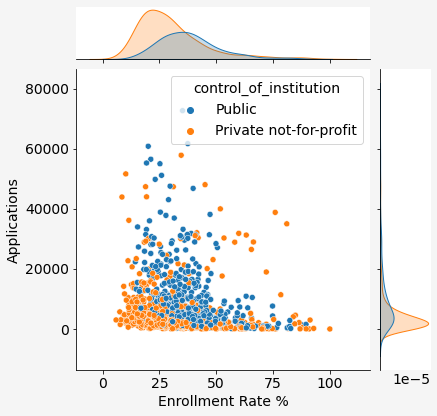

In [43]:
## Also, we could think about a relationship between the rate of enrollment and the inclination for public or private universities.
# Indeed, by using the enrollment rate as a reference of preference, the outcomes could be more meaningful.

g=sns.jointplot(x=data1.enrollment_rate,y=data1.applicants_total,hue=data1.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

## Now, we could ask: 
#### Q: Do students prefer universities with low tuition and fees?

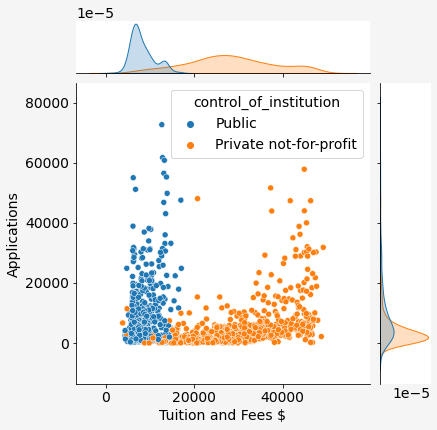

In [44]:
g=sns.jointplot(x=data1.tuition_and_fees_2013_14,y=data1.applicants_total,hue=data1.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

## Q: Do students prefer a university for its low cost of on-campus living?.

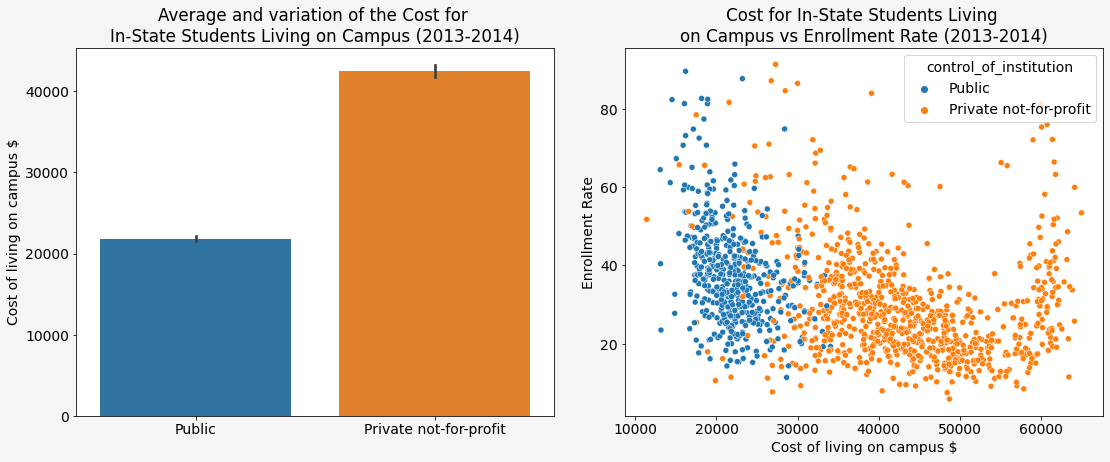

In [45]:
# The dataset contains two columns related to the cost of on-campus living.
# One column displays the cost for in-state students, the other one for out-state students. So, first,
# we're going to analyze these two costs separately.

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=data1.total_price_for_in_state_students_living_on_campus_2013_14,x=data1.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=data1.total_price_for_in_state_students_living_on_campus_2013_14,y=data1.enrollment_rate,hue=data1.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

##### The first and most conspicuous insight that these figures show is that the majority of public universities offer a much more affordable cost for in-state students than private universities. In fact, the average cost in the case of public universities is half of that in the case of private universities.

##### Second, the right figure shows that high enrollment rates are more frequent when the cost is more affordable. This leads us to think that ***students, indeed, look for universities that offer an affordable cost of living on campus for in-state students.***

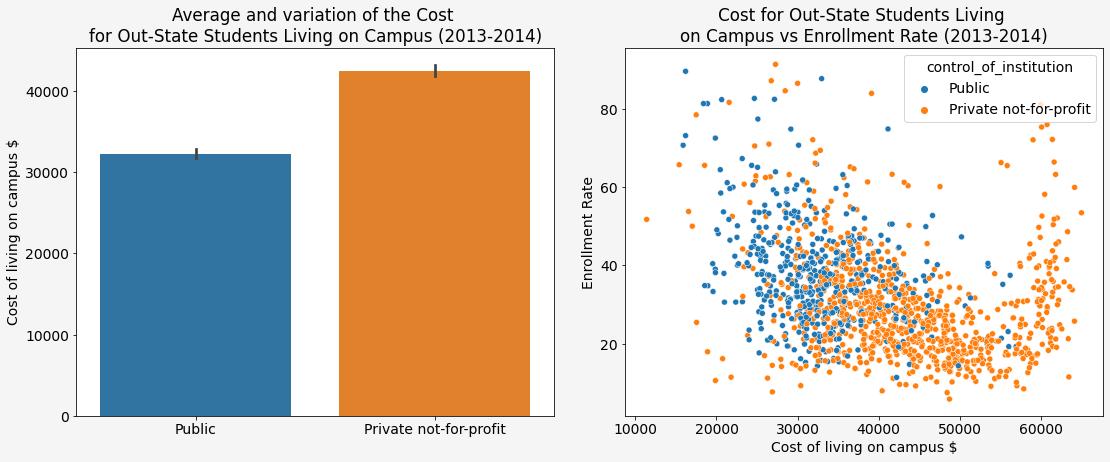

In [46]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sns.scatterplot(x=data1.total_price_for_out_of_state_students_living_on_campus_2013_14,y=data1.enrollment_rate,hue=data1.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=data1.total_price_for_out_of_state_students_living_on_campus_2013_14,x=data1.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

##### In the case of out-state students, the average cost in the case of public universities is, again, lower than that of private universities.

##### Additionally, for out-state students, we find a similar pattern as in the case of in-state students: high enrollment rates are more frequent among affordable costs. ***Therefore, students prefer universities that offer an affordable cost of living on campus for out-state students.***

#### Q: Do students prefer universities from highly populated states? 

##### As a first step to answer this question, let's see a preview about the enrollment rate in each state.

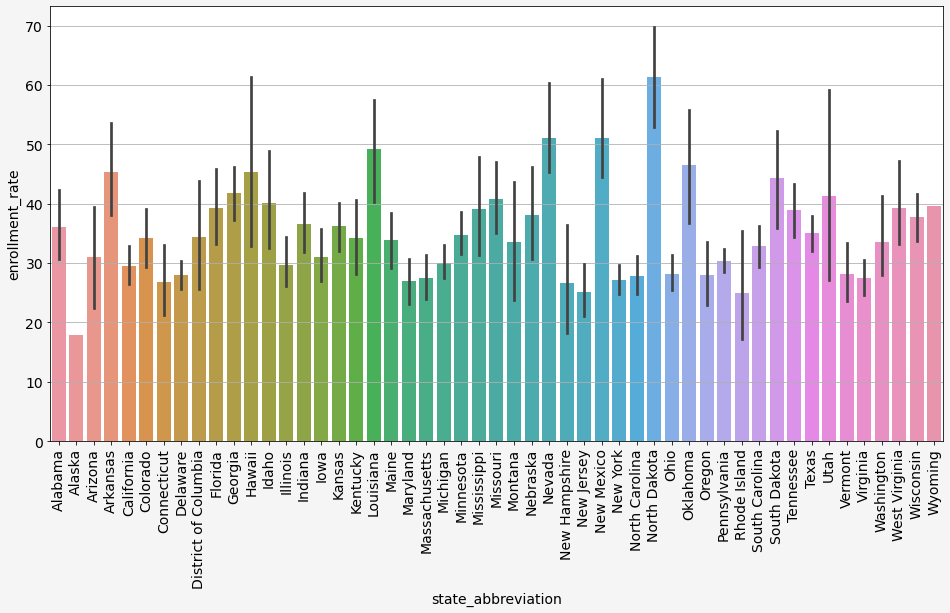

In [49]:
plt.figure(figsize=(16,8))
sns.barplot(x=data1.state_abbreviation,y=data1.enrollment_rate);
plt.grid(axis='y')
plt.xticks(rotation=90);

##### There is a vast fluctuation in enrollment rate among universities of each state. Nonetheless, we can see that the highest average enrollment rate belongs to the state of North Dakota; whereas, the lowest one belongs to Alaska.

In [50]:
# As a final feature, we could think about future academic opportunities that could lead students to choose a university. Currently, there are many types of degrees that universities offer. 

names=data1.columns[data1.columns.str.startswith('offers')].values
degree=data1[data1[names]=='Yes'][names].count().sort_values(ascending=False)


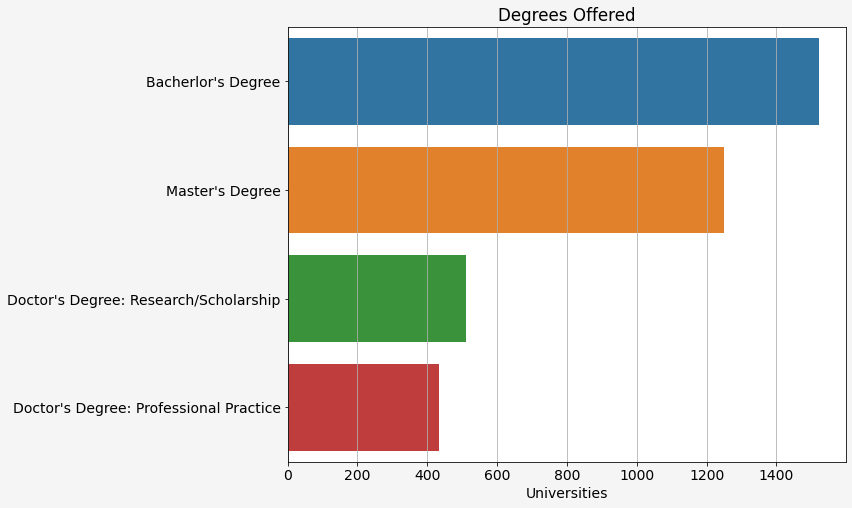

In [51]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=degree,y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"));
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

## Therefore, we could ask: 

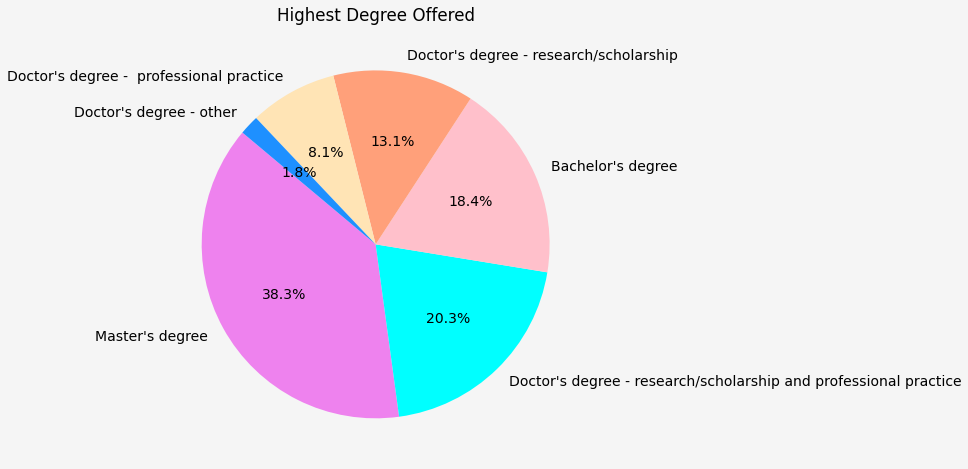

In [52]:
hg_degree=data1.highest_degree_offered.value_counts()

plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140,colors = ['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered');

### The majority of universities offer up to a Master's degree. It's interesting to note that there is a high percentage of universities that offer only up to a Bachelor's degree.

C:\Users\ambar\AppData\Local\Temp\ipykernel_27280\3474016583.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('''Doctor's Degree:


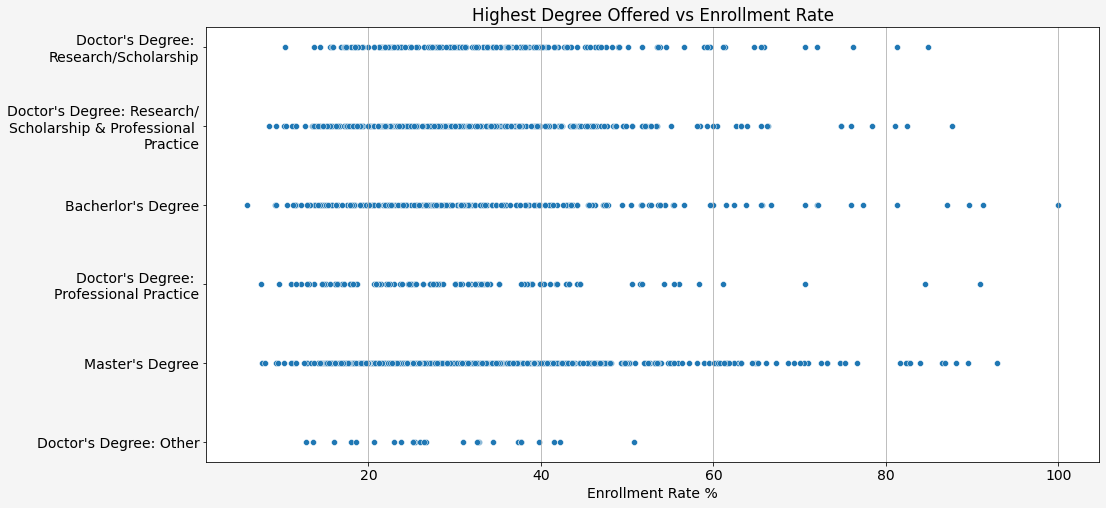

In [53]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enrollment_rate',data=data1);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

#### There are several Doctor's degrees offered, and even though we join them, still, the trend is that, more frequently, universities that offer up to a Bachelor's degree or a Master's degree have high enrollment rates. Therefore, we could think that ***students do not necessarily look for a university thinking about the possibility of continuing a next degree in the same university.***

## 4. Inferences and Conclusions.

* A high number of applications does not imply that a university is preferred among students. In fact, the universities that receive a lower number of applications are the ones with a higher enrollment rate. Obviously, there are some exceptions, but this is the strongest tendency. 

* Based on the lack of a strong pattern among admissions and the enrollment rate, we can say that students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students'preference is not based on how easy it is for them to be admitted to a university.

* By analyzing the enrollment rate, we saw that this rate, on average, is higher for public universities than the average for private universities. So, there is a strong students' preference for public universities.

* When it comes to tuition and fees, students prefer affordable universities. Additionally, the reason or one of the reasons for the students' preference for public universities is that public universities are much more affordable than the majority of private universities.

* In all the analyses made to find a pattern about costs for on-campus living, we found a high enrollment rate more frequently when costs are affordable. This means that students, in-state and out-state students, prefer universities with affordable costs of on-campus living.

* The majority of public universities offer a much more affordable price for in-state students than private universities.

*  The average cost of living for out-state students that public universities offer is higher than that for in-state students. However, the average cost that private universities offer does not make a distinction between in-state and out-state students.

* Since there was no firm trend when analyzing the state population with enrolment rates, we cannot say that students prefer universities of crowded states.

* Students do not prefer a university because of the GDP per capita of the state where the university locates. In other words, students do not choose a university based on the overall well-being of states.

* When students look for a university to study for a Bachelor's degree, they do not frequently choose the university thinking about a future possibility of pursuing a higher degree at the same university.

## References

* https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

* https://blog.dataiku.com/2019/07/04/fundamental-steps-data-project-success
* https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1#reqid=70&step=1&isuri=1 (GDP of the American states).
* https://realpython.com/pandas-python-explore-dataset/